## Bangalore Property price prediction

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
%matplotlib inline

### Reading Data

In [2]:
raw_data = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df = raw_data.copy()

### Exploring data

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.isna().sum()
#'bath' and 'balcony' can be filled with a median value and rows with location or size missing can be dropped
#cells with missing society are assumed to be independent property

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [45]:
df.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [10]:
df.availability.unique()
#maybe 'ready to move' and 'immediate posession' can be put as one group and others at another
#2 classes can be made

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

<AxesSubplot:>

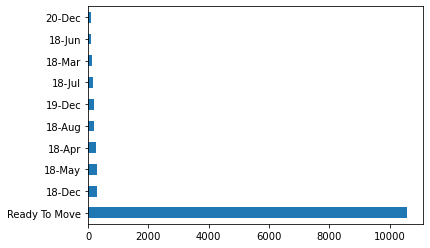

In [53]:
df['availability'].value_counts()[:10].plot(kind = 'barh')
#most fall under ready to move

In [12]:
df['size'].unique()
#it seems there are some errors like a 43 bedroom property that might need cleaning
#can also be stripped of the integer to get an estimate

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df.society.nunique()
#values with NaN can be independent property and rest where we have a value can be generalized to a society
#2 classes can be made

2688

<AxesSubplot:>

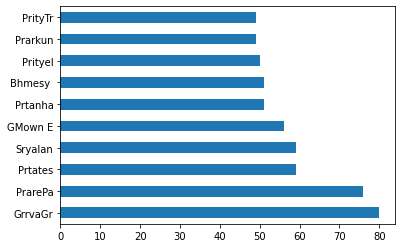

In [55]:
df.society.value_counts()[:10].plot(kind = 'barh')

In [16]:
df.location.nunique()

1305

<AxesSubplot:>

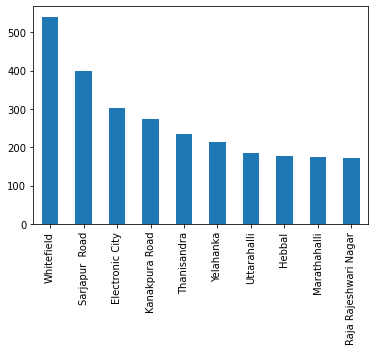

In [56]:
df.location.value_counts()[0:10].plot(kind = 'bar')
#most of the listed properties are in Whitefielsd followed by Sarjapur Road

In [17]:
df.area_type.nunique()

4

In [29]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [34]:
df.groupby('area_type')['price'].agg('mean')

area_type
Built-up  Area          104.285498
Carpet  Area             89.502356
Plot  Area              208.495486
Super built-up  Area     92.971757
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

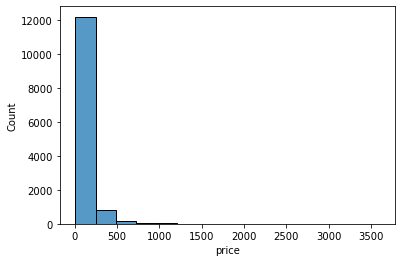

In [38]:
sns.histplot(df.price, bins=15)

<AxesSubplot:xlabel='price', ylabel='Count'>

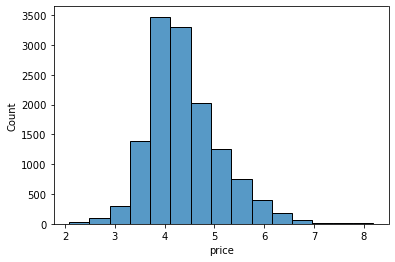

In [39]:
sns.histplot(np.log(df.price), bins=15)
#this seems normally distributed

<AxesSubplot:xlabel='balcony', ylabel='Count'>

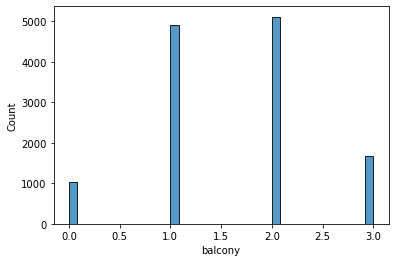

In [46]:
sns.histplot(df.balcony)

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='area_type', ylabel='count'>

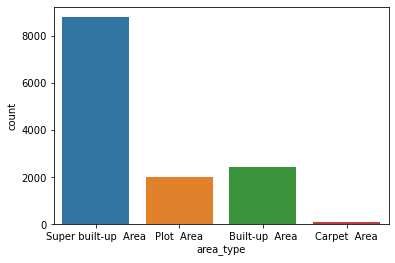

In [47]:
sns.countplot(df.area_type)
#most are in super built-up area

<AxesSubplot:ylabel='location'>

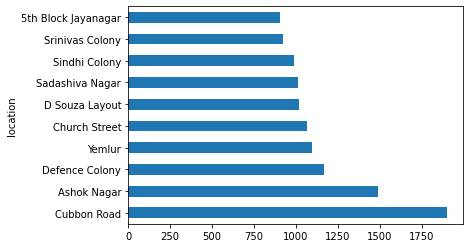

In [71]:
df.groupby('location')['price'].agg('mean').sort_values(ascending = False)[0:10].plot(kind = 'barh')
#average cost based on location for the 10 costliest places

**Summary:** Most of the properties are in Super-Built up areas and a majority are ready to move in. Whitefield has the most number of listed properties and the average cost of the property being highest in Cubbon Road followed by Ashok Nagar. Most of the houeses have atleast one balcony and bathroom. Nearly half of the listed houses are independent i.e. not part of a society.
Further cleaning of the data is required as mentioned in the individual cells above which would be carried out and further studied.

### Cleaning the data and further exploration